In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
# Load your dataset
df = pd.read_csv("./creditcard.csv")  # Replace with your dataset

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
def cols_eda(df): 
    eda_df = {}
    eda_df['null_sum'] = df.isnull().sum()
    eda_df['null_%'] = df.isnull().mean()
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()
    
    return pd.DataFrame(eda_df)

In [10]:
cols_eda(df)

,null_sum,null_%,dtypes,count,mean,median,min,max
Time,0,0.0,float64,284807,9.481386e+04,84692.000000,0.000000,172792.000000
V1,0,0.0,float64,284807,1.168375e-15,0.018109,-56.407510,2.454930
V2,0,0.0,float64,284807,3.416908e-16,0.065486,-72.715728,22.057729
V3,0,0.0,float64,284807,-1.379537e-15,0.179846,-48.325589,9.382558
V4,0,0.0,float64,284807,2.074095e-15,-0.019847,-5.683171,16.875344
V5,0,0.0,float64,284807,9.604066e-16,-0.054336,-113.743307,34.801666
V6,0,0.0,float64,284807,1.487313e-15,-0.274187,-26.160506,73.301626
V7,0,0.0,float64,284807,-5.556467e-16,0.040103,-43.557242,120.589494
V8,0,0.0,float64,284807,1.213481e-16,0.022358,-73.216718,20.007208
V9,0,0.0,float64,284807,-2.406331e-15,-0.051429,-13.434066,15.594995



Classes distribution 
0    284315
1       492
Name: Class, dtype: int64
The percentage of fraudulent transactions is 0.17%.



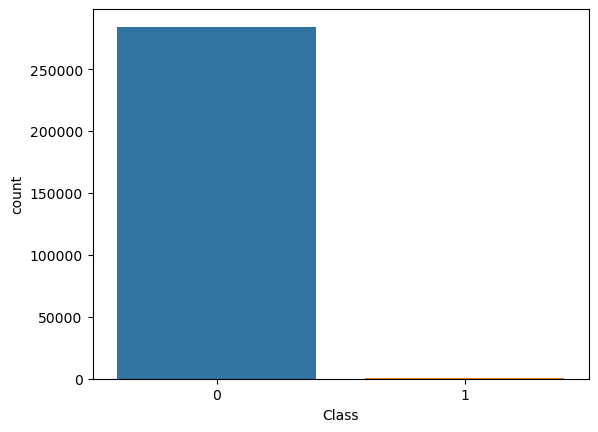

In [11]:
import seaborn as sns
# Assuming you have a DataFrame 'df' with a column 'Class'
sns.countplot(x='Class', data=df)

cls_counts = df['Class'].value_counts()
print(f"""
Classes distribution \n{cls_counts}
The percentage of fraudulent transactions is {round(cls_counts[1] * 100 / cls_counts.sum(), 2)}%.
""")

<Axes: xlabel='Class', ylabel='count'>

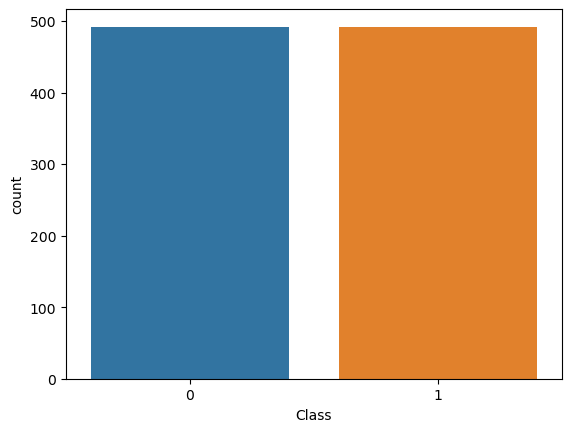

In [12]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(df.drop(columns='Class'), df['Class'])
df_balanced = pd.concat([X, y], axis=1)

sns.countplot(x='Class', data=df_balanced)

<Axes: >

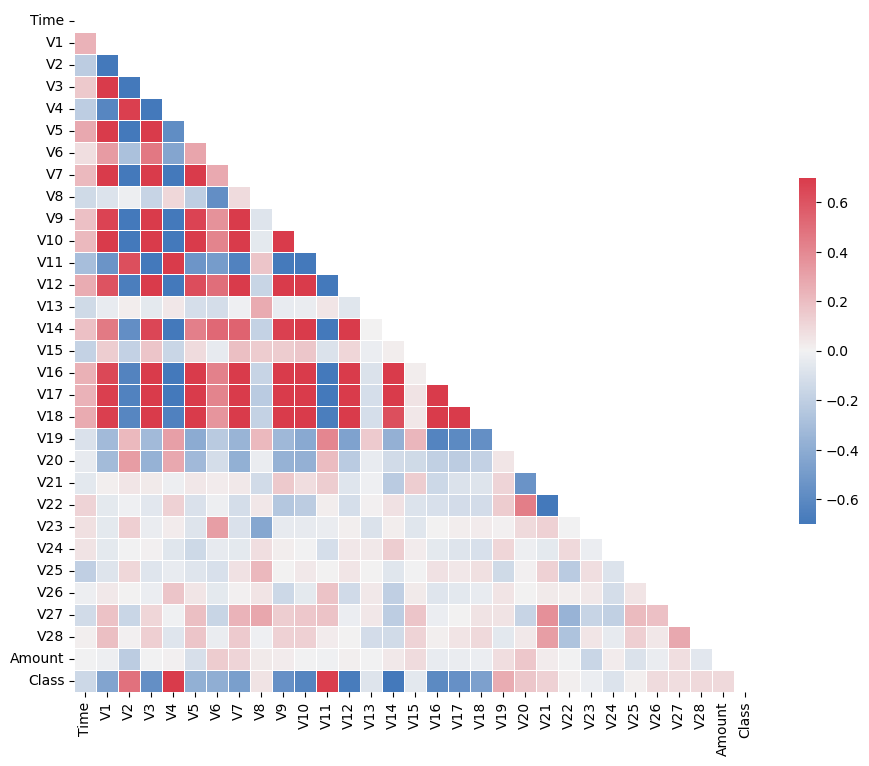

In [13]:
import numpy as np 
import matplotlib.pyplot as plt
corr = df_balanced.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  # Use bool directly or np.bool_ if specifically needed
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(250, 9, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-0.7, vmax=0.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

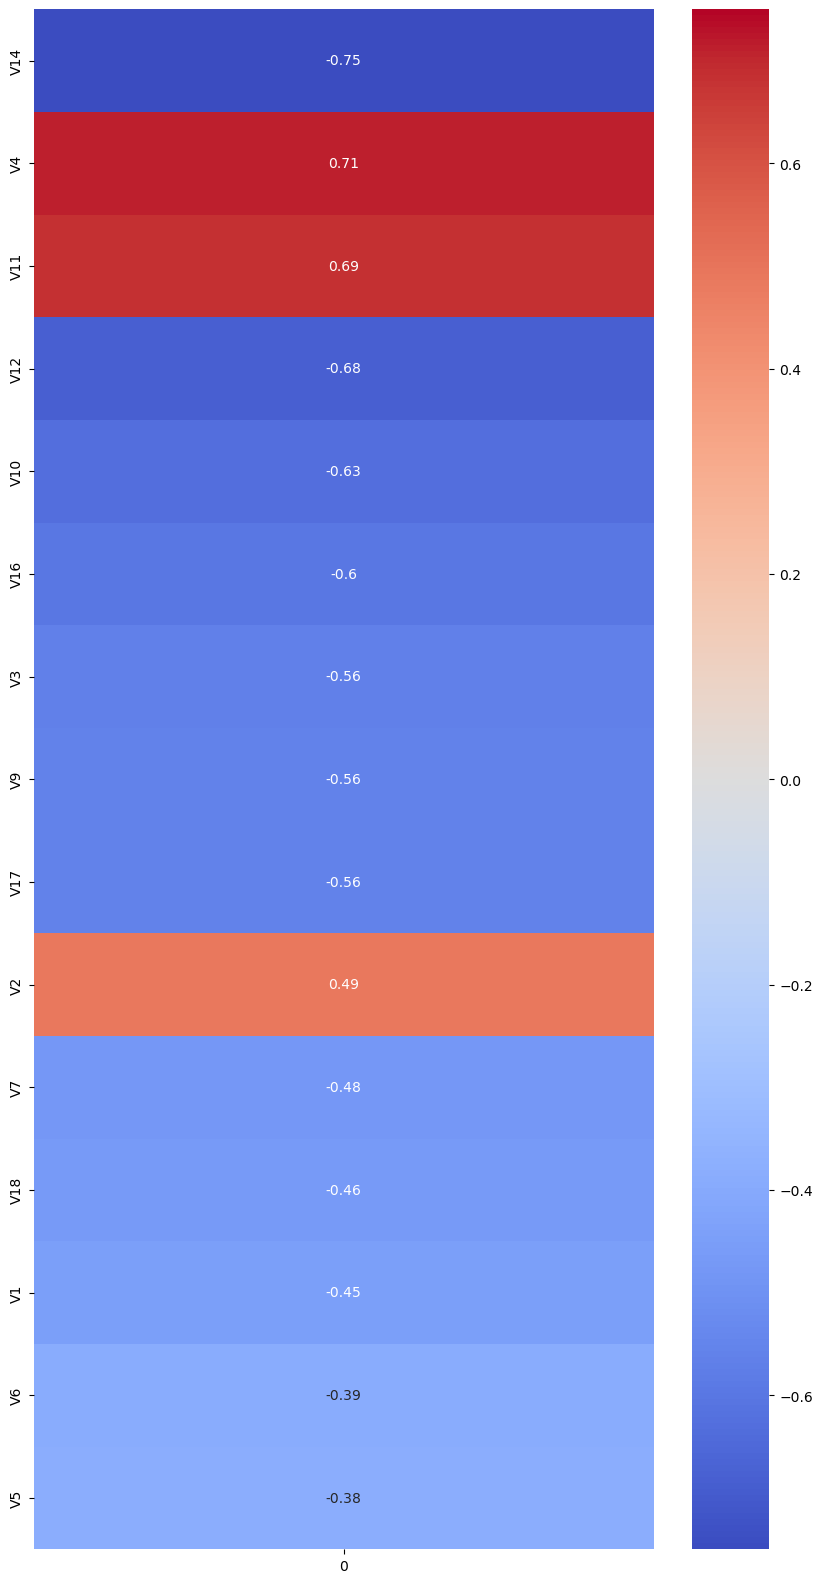

In [14]:
correlations = df_balanced.corrwith(df_balanced['Class']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations[:15].to_frame(), cmap='coolwarm', annot=True, vmin=-0.75, vmax=0.75, ax=ax);

C:\Users\Humzah\AppData\Local\Temp\ipykernel_17996\4257441226.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_balanced[df_balanced.Class==0][col], label='0', ax=axes[i//3][i%3])
C:\Users\Humzah\AppData\Local\Temp\ipykernel_17996\4257441226.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distpl

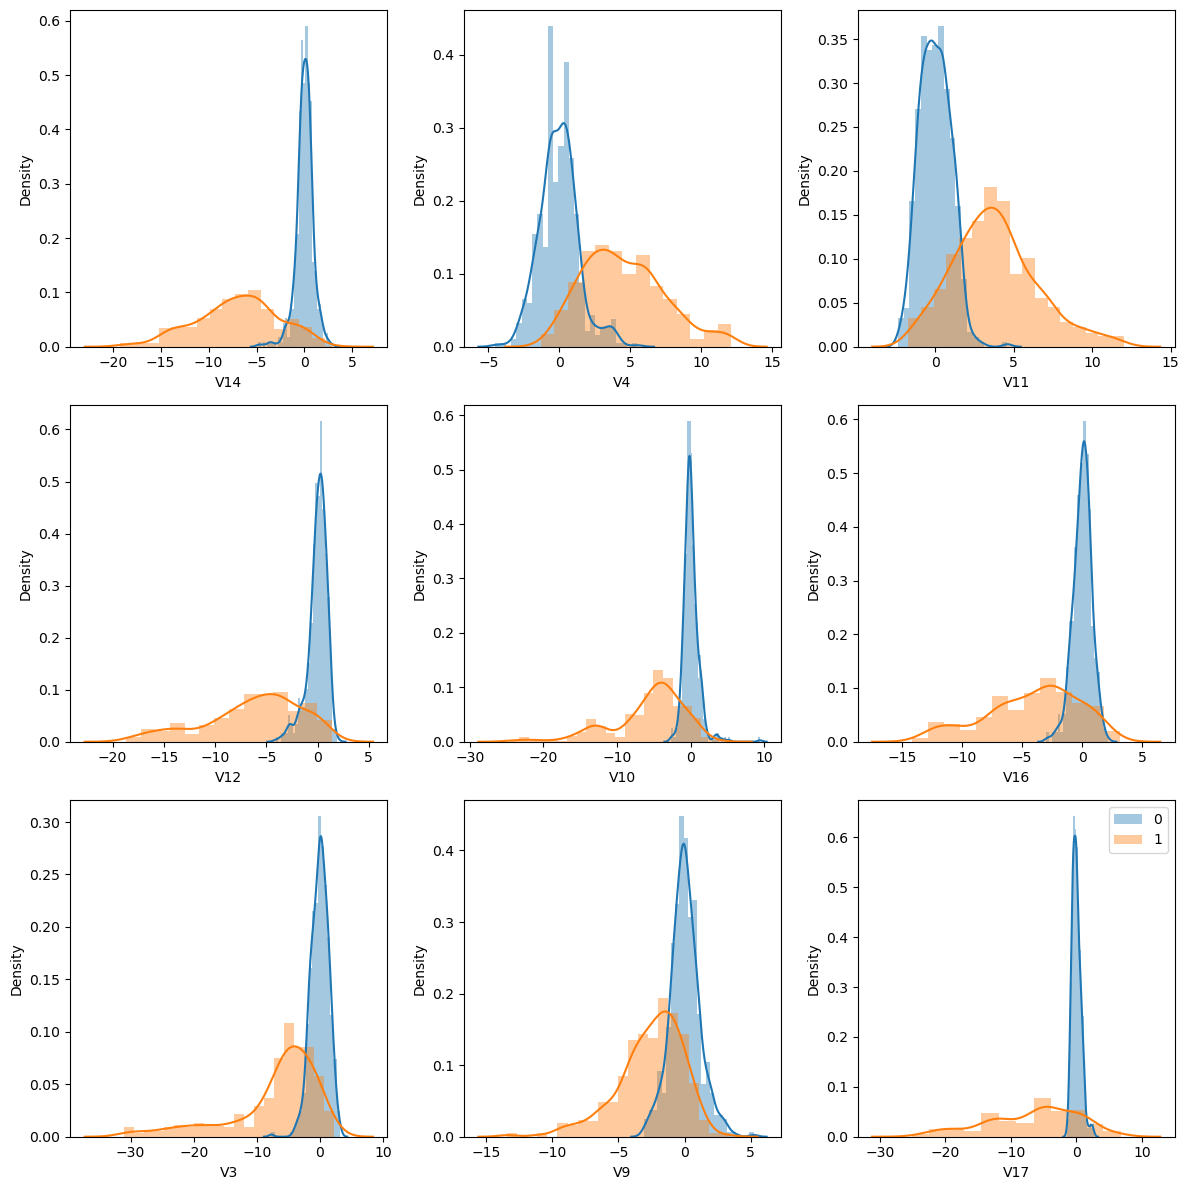

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for i, col in enumerate(sorted_correlations.index[:9]):
    sns.distplot(df_balanced[df_balanced.Class==0][col], label='0', ax=axes[i//3][i%3])
    sns.distplot(df_balanced[df_balanced.Class==1][col], label='1', ax=axes[i//3][i%3])
plt.legend()
plt.tight_layout()

# Training

In [93]:
# Load your dataset
data = pd.read_csv("creditcard.csv")  # Replace with your dataset

In [94]:
# Data preprocessing
X = data.drop("Class", axis=1)
y = data["Class"]
# Apply RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# SVM

In [97]:
# Train and evaluate SVM
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)

SVC()

In [98]:
y_pred_svm = svm_classifier.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
# Print and save results for SVM
print("SVM Accuracy:", accuracy_svm)
print("SVM Precision:", precision_svm)
print("SVM Recall:", recall_svm)
print("SVM F1 Score:", f1_svm)
print()

SVM Accuracy: 0.9390862944162437
SVM Precision: 0.9777777777777777
SVM Recall: 0.8979591836734694
SVM F1 Score: 0.9361702127659575



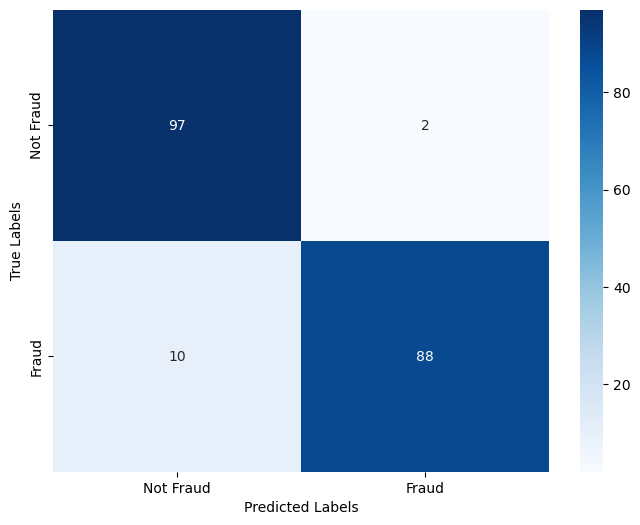

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        99
           1       0.98      0.90      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197




In [99]:
# Print results for SVM
# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print()

# KNN

In [22]:
# Train and evaluate KNN
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [23]:
y_pred_knn = knn_classifier.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
# Print and save results for KNN
print("KNN Accuracy:", accuracy_knn)
print("KNN Precision:", precision_knn)
print("KNN Recall:", recall_knn)
print("KNN F1 Score:", f1_knn)
print()

KNN Accuracy: 0.9187817258883249
KNN Precision: 0.9555555555555556
KNN Recall: 0.8775510204081632
KNN F1 Score: 0.9148936170212767



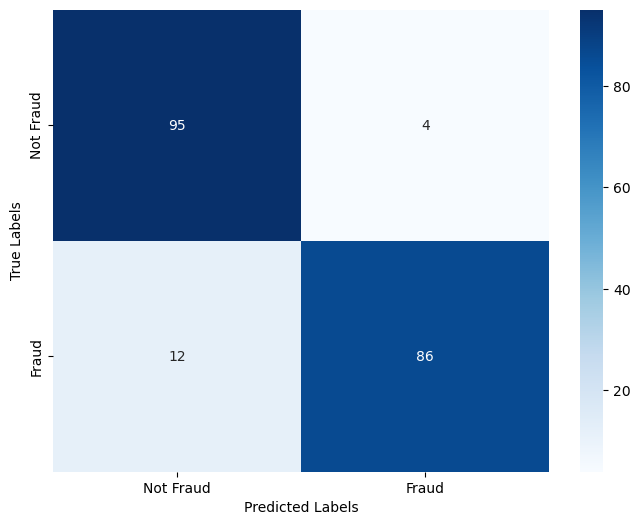

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        99
           1       0.96      0.88      0.91        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197




In [24]:
# Print results for KNN
# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))
print()

# CNN- LSTM

In [115]:
import time
# List of split ratios
split_ratios = [0.6, 0.7, 0.8]

# Initialize result tables
results_training = []
results_testing = []

model = Sequential([
Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_resampled.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=256, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### CNN - LSTM with ratios

In [116]:
# Loop over different split ratios
for split_ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=split_ratio, random_state=42)

    # Data preprocessing
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
    X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

    # Implement early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    start_time = time.time()
    model.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test), callbacks=[early_stopping])
    end_time = time.time()
    elapsed_time = end_time - start_time

    y_pred_cnn_probs_train = model.predict(X_train_reshaped)
    y_pred_cnn_probs_test = model.predict(X_test_reshaped)

    y_pred_cnn_train = (y_pred_cnn_probs_train > 0.5).astype(int)
    y_pred_cnn_test = (y_pred_cnn_probs_test > 0.5).astype(int)

    accuracy_cnn_training = accuracy_score(y_train, y_pred_cnn_train)
    accuracy_cnn_testing = accuracy_score(y_test, y_pred_cnn_test)

    # Store results in the tables
    results_training.append((split_ratio, len(X_train), len(X_test), accuracy_cnn_training, elapsed_time))
    results_testing.append((split_ratio, len(X_train), len(X_test), accuracy_cnn_testing, elapsed_time))

Epoch 1/100
13/13 [==============================] - 1s 27ms/step - loss: 0.5963 - accuracy: 0.7710 - val_loss: 0.4534 - val_accuracy: 0.8020
Epoch 2/100
13/13 [==============================] - 0s 13ms/step - loss: 0.3860 - accuracy: 0.8448 - val_loss: 0.3328 - val_accuracy: 0.8629
Epoch 3/100
13/13 [==============================] - 0s 13ms/step - loss: 0.3264 - accuracy: 0.8677 - val_loss: 0.3199 - val_accuracy: 0.8900
Epoch 4/100
13/13 [==============================] - 0s 13ms/step - loss: 0.2871 - accuracy: 0.8880 - val_loss: 0.3039 - val_accuracy: 0.8951
Epoch 5/100
13/13 [==============================] - 0s 13ms/step - loss: 0.2766 - accuracy: 0.9059 - val_loss: 0.2562 - val_accuracy: 0.9154
Epoch 6/100
13/13 [==============================] - 0s 13ms/step - loss: 0.2837 - accuracy: 0.8931 - val_loss: 0.3081 - val_accuracy: 0.9019
Epoch 7/100
13/13 [==============================] - 0s 15ms/step - loss: 0.2616 - accuracy: 0.8957 - val_loss: 0.2121 - val_accuracy: 0.9357
Epoch 

7/7 [==============================] - 0s 20ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.2758 - val_accuracy: 0.9442
Epoch 7/100
7/7 [==============================] - 0s 19ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.2817 - val_accuracy: 0.9416
Epoch 8/100
7/7 [==============================] - 0s 20ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.4702 - val_accuracy: 0.9353
Epoch 9/100
7/7 [==============================] - 0s 21ms/step - loss: 0.1691 - accuracy: 0.9439 - val_loss: 0.1801 - val_accuracy: 0.9454
Epoch 10/100
7/7 [==============================] - 0s 20ms/step - loss: 0.1021 - accuracy: 0.9745 - val_loss: 0.1743 - val_accuracy: 0.9467
Epoch 11/100
25/25 [==============================] - 0s 2ms/step


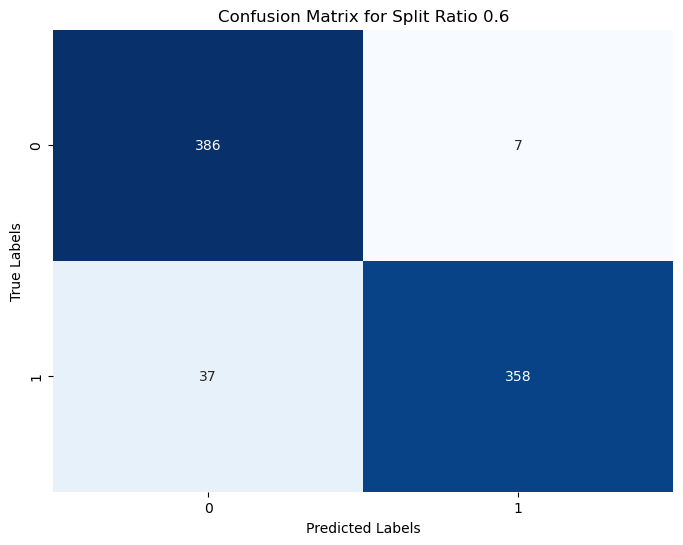

In [134]:
cm = confusion_matrix(y_test, y_pred_cnn_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Split Ratio 0.6")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [119]:
# Create dataframes from the tables
columns = ['Split Ratio', 'Train Data Size', 'Test Data Size', 'Accuracy', 'Time Elapsed (sec)']
df_results_training = pd.DataFrame(results_training, columns=columns)
df_results_testing = pd.DataFrame(results_testing, columns=columns)


In [132]:
df_results_training

,Split Ratio,Train Data Size,Test Data Size,Accuracy,Time Elapsed (sec)
0,0.6,393,591,0.984198,5.738227
1,0.7,295,689,0.976271,4.075940
2,0.8,196,788,0.979592,1.508977


In [128]:
df_results_testing

,Split Ratio,Train Data Size,Test Data Size,Accuracy,Time Elapsed (sec)
0,0.6,393,591,0.963210,5.738227
1,0.7,295,689,0.950210,4.075940
2,0.8,196,788,0.944162,1.508977


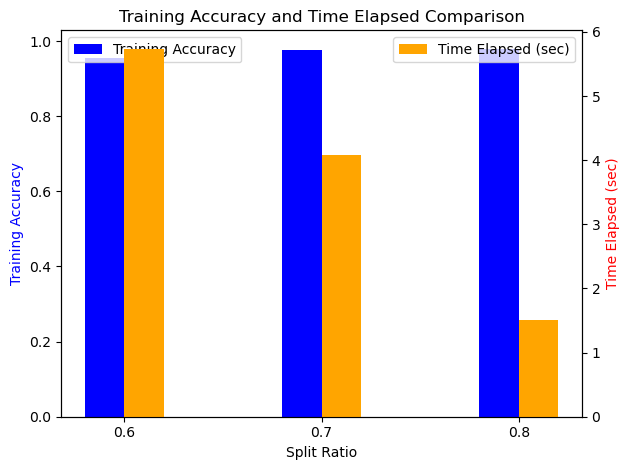

In [145]:
# Extract data from the results_training table
split_ratios = [result[0] for result in results_training]
train_accuracies = [result[3] for result in results_training]
time_elapsed = [result[4] for result in results_training]

# Create an array for x-axis positions
x = np.arange(len(split_ratios))

# Width of the bars
width = 0.2

# Create the double bar plot
fig, ax1 = plt.subplots()

# Plot the training accuracy
ax1.bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='b')

# Create a twin Axes sharing the xaxis
ax2 = ax1.twinx()

# Plot the time elapsed
ax2.bar(x + width/2, time_elapsed, width, label='Time Elapsed (sec)', color='orange')

# Set labels, title, and legend
ax1.set_xlabel('Split Ratio')
ax1.set_ylabel('Training Accuracy', color='b')
ax2.set_ylabel('Time Elapsed (sec)', color='r')
ax1.set_title('Training Accuracy and Time Elapsed Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(split_ratios)
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


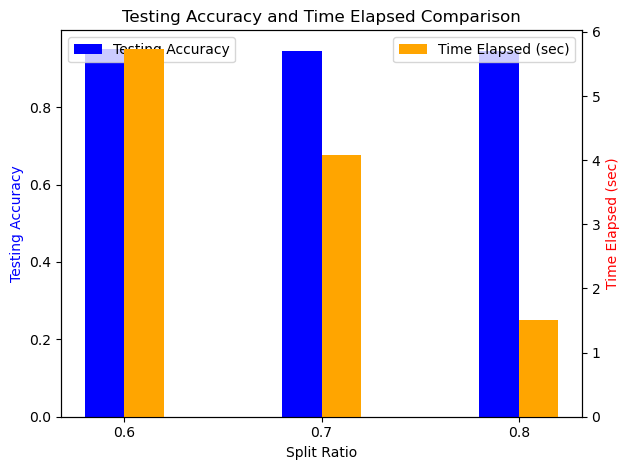

In [146]:
# Extract data from the results_training table
split_ratios = [result[0] for result in results_testing]
test_accuracies = [result[3] for result in results_testing]
time_elapsed = [result[4] for result in results_testing]

# Create an array for x-axis positions
x = np.arange(len(split_ratios))

# Width of the bars
width = 0.2

# Create the double bar plot
fig, ax1 = plt.subplots()

# Plot the training accuracy
ax1.bar(x - width/2, test_accuracies, width, label='Testing Accuracy', color='b')

# Create a twin Axes sharing the xaxis
ax2 = ax1.twinx()

# Plot the time elapsed
ax2.bar(x + width/2, time_elapsed, width, label='Time Elapsed (sec)', color='orange')

# Set labels, title, and legend
ax1.set_xlabel('Split Ratio')
ax1.set_ylabel('Testing Accuracy', color='b')
ax2.set_ylabel('Time Elapsed (sec)', color='r')
ax1.set_title('Testing Accuracy and Time Elapsed Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(split_ratios)
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(loc='upper right', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


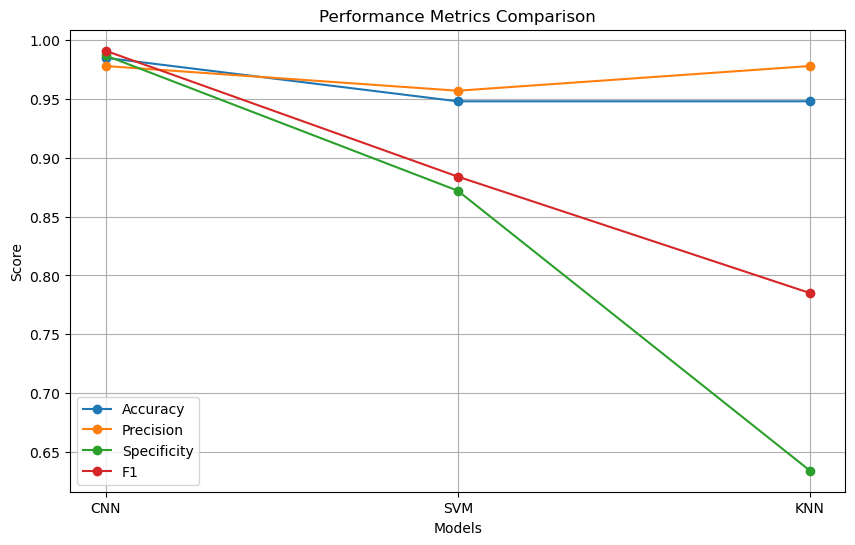

In [157]:
# Extract the performance metrics from the results
models = ['CNN', 'SVM', 'KNN']
accuracy = [accuracy_cnn, accuracy_svm, accuracy_knn]
precision = [precision_cnn, precision_svm, precision_knn]
specificity = [specificity_cnn, specificity_svm, specificity_knn]
f1 = [f1_cnn, f1_svm, f1_knn]

# Create the line graph
plt.figure(figsize=(10, 6))

# Plot lines for each metric
plt.plot(models, accuracy, marker='o', label='Accuracy')
plt.plot(models, precision, marker='o', label='Precision')
plt.plot(models, specificity, marker='o', label='Specificity')
plt.plot(models, f1, marker='o', label='F1')

# Set labels, title, and legend
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.legend()
plt.grid(True)

plt.show()
